# *Final Data Assignment: Analyzing Little Women by Louisa May Alcott*

**First Task**: Analyzing and Visualizing the Literary Network: Which Characters have the closest Relationships?


In [279]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
import re, itertools
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl
import os
%matplotlib inline
plt.style.use('Solarize_Light2')

with open(r'C:\Users\HOF01WIN10\Documents\Master Literaturwissenschaft/lilwomen.txt', 'r', encoding='utf8') as rf:
    text = rf.read()
textclean = re.sub(r'./!/,/?', '',text)
textclean = textclean[text.find("HARVEST TIME")+len("HARVEST TIME"):textclean.find("End of the Project Gutenberg EBook of Little Women, by Louisa May Alcott")].strip()
chapters = re.split(r"CHAPTER", textclean)
textclean = textclean.lower()
textclean = re.sub(' +',' ', textclean) 
textclean = re.sub(r'\n\s*\n', '\n',textclean)
paragraphs = textclean.split("\n")
print(len(chapters))
print(len(paragraphs))

48
16512


In [288]:
with open(r'C:\Users\HOF01WIN10\Documents/characters.txt', 'r', encoding='utf8') as rf:
    characters = rf.read().split("\n")
    characters = [character.split(", ") for character in characters]
character_assoc_dictionary = dict()

for chapter in paragraphs:
    appears = []
    for character in characters:
        for name in character:
            if name in chapter:
                appears.append(character[0])
                break
    relationships = itertools.combinations(sorted(appears),2)
    for relationship in relationships:
        if relationship in character_assoc_dictionary:
            character_assoc_dictionary[relationship] += 1
        else:
            character_assoc_dictionary[relationship] = 1


[('jo', 'meg', {'weight': 105}), ('jo', 'amy', {'weight': 65}), ('jo', 'beth', {'weight': 68}), ('jo', 'marmee', {'weight': 26}), ('jo', 'aunt march', {'weight': 12}), ('jo', 'laurie', {'weight': 92}), ('jo', 'hannah', {'weight': 7}), ('jo', 'mr. brooke', {'weight': 172}), ('jo', 'mr. laurence', {'weight': 11}), ('jo', 'dr. bangs', {'weight': 1}), ('jo', 'mr. march', {'weight': 2}), ('meg', 'amy', {'weight': 30}), ('meg', 'beth', {'weight': 28}), ('meg', 'marmee', {'weight': 15}), ('meg', 'hannah', {'weight': 9}), ('meg', 'laurie', {'weight': 22}), ('meg', 'mr. brooke', {'weight': 33}), ('meg', 'aunt march', {'weight': 4}), ('meg', 'dr. bangs', {'weight': 1}), ('meg', 'ned moffat', {'weight': 1}), ('laurie', 'mr. laurence', {'weight': 8}), ('laurie', 'beth', {'weight': 12}), ('laurie', 'amy', {'weight': 32}), ('laurie', 'ned moffat', {'weight': 1}), ('laurie', 'mr. brooke', {'weight': 7}), ('laurie', 'marmee', {'weight': 3}), ('laurie', 'hannah', {'weight': 2}), ('laurie', 'aunt march'

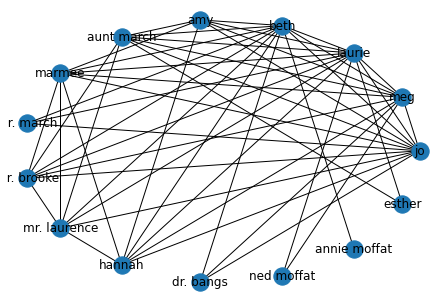

In [286]:
G = nx.Graph()

for character in characters:
    G.add_node(character[0])

for edge, weight in character_assoc_dictionary.items():
    G.add_edge(edge[0], edge[1], weight=weight)

print(G.edges().data())

nx.draw_circular(G, with_labels=True)
plt.show()

**Conclusion of the First Task:** In the network we can clearly identify our main characters and their relationship with each other. Our main characters, those entities with the most connections to other entities, are Jo, Beth, Amy, Meg and Laurie.

**Addition to First Task**: At first I used a .txt file with all the character names that I had made myself. Out of curiosity I decided to try an NER Tagger to filter out my entities/characters. I then cleaned the list, and created a Dataframe with it and displayed the relations between the characters (but only if the weight of the relation was above '2')

In [290]:
import spacy
import en_core_web_sm
from collections import Counter
import pandas as pd
pd.set_option("max_rows", 400)
import networkx 
import itertools
nlp = en_core_web_sm.load()

In [292]:
filepath = r"C:\Users\HOF01WIN10\Documents\Master Literaturwissenschaft/lilwomen.txt"
text = open(filepath).read()
document = nlp(text[:1000000])

In [301]:
identified_entities = []

for named_entity in document.ents:
    if named_entity.label_ == "ENTITY":
        
        identified_entities.append(named_entity.text)
print(len(identified_entities))

0


In [302]:
pd.DataFrame(Counter(identified_entities).most_common(), columns=['character', 'count']).to_csv('identified-entity.csv', index=False)
my_list_of_characters = pd.read_csv(r"C:\Users\HOF01WIN10\Downloads\identified-entities-clean.csv")['character'].tolist()

#from IPython.display import FileLink
#FileLink("spacy-identified-people.csv")


In [303]:
print(my_list_of_characters)

['Jo', 'Laurie', 'Beth', 'Meg', 'Amy', 'Hannah', 'Brooke', 'Bhaer', 'Teddy', 'Demi', 'Marmee', 'Kate', 'John', 'Daisy', 'Ned', 'Fred', 'Davis', 'Flo', 'Bangs', 'Shakespeare', 'Gardiner', 'Scott', 'Belsham', 'Clara', 'Minna', 'Tina', 'Fritz', 'Glad', 'Annie Moffat', 'Susie', 'Cutter', 'George', 'Belle', 'Viola', 'Pip', 'Sallie Gardiner', 'Sallie Moffat']


In [309]:
all_people_matches = []
all_people_matches_plus_ids = []
for named_entity in document.ents:
    if named_entity.text in my_list_of_characters:
        person = named_entity.text
        
        person = person.replace("’s", "").strip()
        person_index = named_entity.start_char
        
        all_people_matches.append(person)
        all_people_matches_plus_ids.append([person, person_index])

In [310]:
edge_list = []

threshold_distance = 50

#If two people fall within 50 characters of one another, add them to the edge list
for person, another_person in itertools.combinations(all_people_matches_plus_ids, 2):
        distance = abs(person[1] - another_person[1])
        
        if distance < threshold_distance:
            
            if person[0] != another_person[0]:
                
                edge_list.append((person[0], another_person[0]))

In [311]:
character_df = pd.DataFrame(Counter(edge_list).most_common(), columns=['character_pair', 'Weight'])
character_df['Source']=character_df['character_pair'].str[0]
character_df['Target']=character_df['character_pair'].str[1]

In [312]:
character_network = character_df[['Source', 'Target', 'Weight']]
#character_network
character_network[character_network['Weight'] > 2]


,Source,Target,Weight
0,Meg,Jo,50
1,Jo,Beth,42
2,Jo,Meg,41
3,Jo,Laurie,39
4,Beth,Jo,33
5,Laurie,Jo,33
6,Meg,Beth,24
7,Laurie,Meg,12
8,Brooke,Meg,12
9,Meg,Laurie,11


**Conclusion:** we can clearly see that Meg and Jo, the two oldest sisters, appear most often within a close distance of one another. From this we can conclude that they are having a close relationship. It is evident that Jo, Meg, Beth, Amy and Laurie all have a very close relationship with each other, and seem to be appearing most often within a certain distance of each other. We can also tell that the the relations with the most weight most often include Jo, who seems to be the main character of the book. 


**Second Task**: After analyzing the network of characters I want to know how often the main characters are mentioned throughout the book. This will give us an idea about whom the book is mainly about. 

In [95]:
list_words = textclean.split()
print(list_words[:55])
list_cleaned = []
from string import punctuation
for word in list_words:
    if word not in punctuation:
        list_cleaned.append(word)


['chapter', 'one', 'playing', 'pilgrims', '"christmas', "won't", 'be', 'christmas', 'without', 'any', 'presents,"', 'grumbled', 'jo,', 'lying', 'on', 'the', 'rug.', '"it\'s', 'so', 'dreadful', 'to', 'be', 'poor!"', 'sighed', 'meg,', 'looking', 'down', 'at', 'her', 'old', 'dress.', '"i', "don't", 'think', "it's", 'fair', 'for', 'some', 'girls', 'to', 'have', 'plenty', 'of', 'pretty', 'things,', 'and', 'other', 'girls', 'nothing', 'at', 'all,"', 'added', 'little', 'amy,', 'with']


In [96]:
import nltk
listcount = []
little_characters = ["jo", "meg", "amy" , "beth",  "laurie"]
for element in list_cleaned:
    if element in little_characters:
        listcount.append(element)

little_frequency = nltk.FreqDist(listcount)
little_frequency.tabulate(6)

    jo    meg    amy laurie   beth 
   697    386    358    348    237 


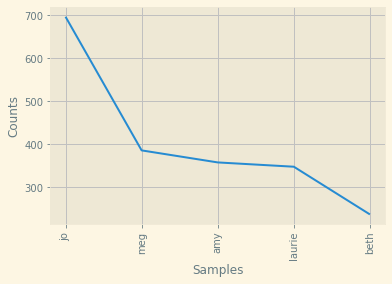

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [97]:
little_frequency.plot(100)

**Conclusion of the Second Task:** This confirms our hypothesis from the Network Analysis, that Jo is the main character of the book. After Jo Meg is the second most mentioned, than follows Amy, Laurie and Beth. It is interesting that Amy appears often in the book but not that often in close distance to the other sisters. This could be because after the first half of the book she moves away to Europe and follows her own storyarch. Beth is the least mentioned because she dies after the first half of the book, which explains the low frequency of her name in comparision to the other sisters and laurie.

**Third Task:** Now I want to research the role of religion/religious advice in the novel. For that I decided to use Natural Language Processing and search the concordences for words associated with religious practice. I searched for the words "pray", "God","religion" to see in what context religious elements are mentioned in the book. Sadly the nltk only shows the first 25 matches, so we do not get the full extend of the religious undertones in the novel.

In [316]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import nltk
from urllib import request
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('punkt')
    

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HOF01WIN10\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [328]:
url = "https://www.gutenberg.org/cache/epub/514/pg514.txt"

In [329]:
response = request.urlopen(url)
raw = response.read().decode('utf8')
tokens = nltk.word_tokenize(raw)
text = nltk.Text(tokens)

In [389]:
text.concordance("God")
text.concordance("pray")
text.concordance("blessed")
text.concordance("religion")


Displaying 25 of 34 matches:
le girl once , with eyes like these . God bless you , my dear ! Good day , mada
h . Believe this heartily , and go to God with all your little cares , and hope
little care and sorrow to try them as God sees fit to send . To be loved and ch
the spot . `` Good-by , my darlings ! God bless and keep us all ! '' whispered 
 the letter came , and tried to thank god for being so good to us , but I could
et your husband want anything . Thank God he is mending . Your sincere friend a
t . Mother and father both gone , and God seems so far away I ca n't find Him .
l love her so much , I do n't believe God will take her away yet . '' `` The go
 , waiting , hoping , and trusting in God and Mother , and all day the snow fel
mes to us in hours like those . `` If God spares Beth , I never will complain a
 , '' whispered Meg earnestly . `` If god spares Beth , I 'll try to love and s
ink good thoughts , and pray the dear God preserve your sister . '' Esther was 
 good thoug

**Conclusion of the Third Task:** From the shown concoordances of "God" we can tell that is often uses in the phrases such as "thank God". The word "God" appears often in the part of the book where Beth falls ill and is on the brink of death. The word "pray" is often used as an imperative, as a call to pray to God for help in difficult situations. From the shown concoordences I can conclude that religion is a major theme of the book, or at least that the story is set in a religious enviroment. We can also tell that religion is regarded rather positive and not ironized or critiqued. 

**Fourth Task:** for the next task I tried using TextBlob and Vader to make a Sentiment Analysis of the Text. 

In [390]:
from textblob import TextBlob
nltk.download('punkt')
SA = TextBlob(textclean)
print (SA.sentiment)
#print(SA.tags)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HOF01WIN10\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Sentiment(polarity=0.14738545030015038, subjectivity=0.5400008797817779)


In [8]:
import nltk
nltk.download('vader_lexicon')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
vs = analyzer.polarity_scores(textclean [0:1000])
print(vs)

{'neg': 0.114, 'neu': 0.812, 'pos': 0.074, 'compound': -0.7989}


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HOF01WIN10\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HOF01WIN10\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


**Conclusion of the Fourth Task:** The sentiment function of textblob returns two properties, polarity, and subjectivity. We can see that polarity is ~ 0,15 which means that the statement is rather neutral. Subjectivity is 0.54, that shows that the text is subjective and not a factual information - which isn't surprising for a work of fiction. The Sentiment Analysis with Vader couldn't take the whole text without freezing my laptop, so I just let it analyze the first 1000 elements of the text. From that we can see that the text excerpt is mostly neutral in sentiment.

**Final Task:** For my final task I tried my hand at scraping. I tried to get some reviews of Little Women from the Website www.goodreads.com and match the reviews up with corresponding usernames of the reviewers and display them in a easy readable form. 

In [391]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests

In [392]:
url = "https://www.goodreads.com/book/show/1934.Little_Women"
html = urlopen(url)
page = requests.get(url) 
soup = BeautifulSoup(page.content, 'html.parser')
#print(soup.prettify())
print(soup.title)

<title>Little Women by Louisa May Alcott</title>


In [393]:
usernames = soup.find_all('a', class_='user')
reviews = soup.find_all('div', class_='reviewText stacked')

for usernames, reviews in zip(usernames, reviews):
    print("User: ", usernames.get_text(), "Review: " , reviews.get_text())
print(zip)

User:  Miranda Reads Review:  



Galentine's Day is right around the corner...so why not curl up with a good book? Check out my latest 

BooktTube Video 

 - all about five fabulous books on female friendship!
The Written Review




“Don't try to make me grow up before my time…”
 The March sisters may be radically different but they all have one thing in common - love. Their love for their mother and father, their love for adventure and for each other unites them in this troubled time.The Civil War is afoo


Galentine's Day is right around the corner...so why not curl up with a good book? Check out my latest 

BooktTube Video 

 - all about five fabulous books on female friendship!
The Written Review




“Don't try to make me grow up before my time…”
 The March sisters may be radically different but they all have one thing in common - love. Their love for their mother and father, their love for adventure and for each other unites them in this troubled time.The Civil War is afoot and a